# Laptop Price Predictor using Machine Learning

1. Data Cleaning
2. EDA
3. Feature Engg
4. Modelling
5. Website
6. Deployment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('laptopData.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
df.duplicated().sum()

29

<Axes: >

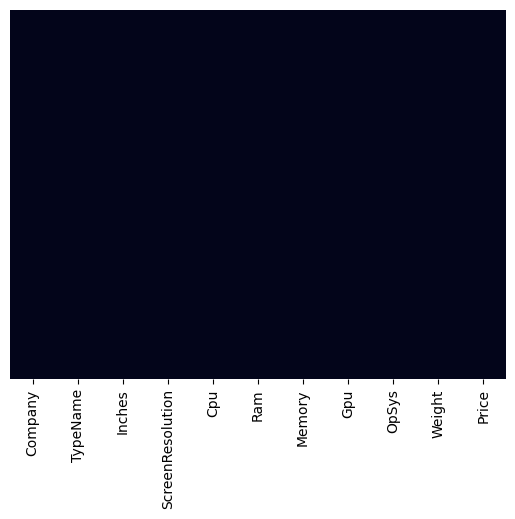

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [9]:
# df.drop_duplicates(inplace=True)

In [10]:
# df.dropna(inplace=True)

<Axes: >

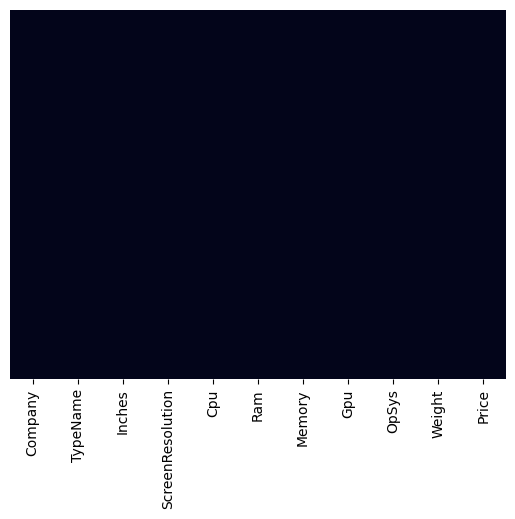

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [12]:
df['Ram'] = df.Ram.str.replace('GB','')
df['Weight'] = df.Weight.str.replace('kg','')

In [13]:
df['Ram'] = df.Ram.astype('int32')
# df['Weight'] = df.Weight.astype('float32')

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
# Replacing "?" with mode value
mode_value = df['Weight'].mode()[0]
df['Weight'] = df['Weight'].replace('?', mode_value)

mode_value = df['Inches'].mode()[0]
df['Inches'] = df['Inches'].replace('?', mode_value)

In [16]:
df.iloc[201,:]

Company                                 Lenovo
TypeName                              Notebook
Inches                                    15.6
ScreenResolution                      1366x768
Cpu                 Intel Core i5 6200U 2.3GHz
Ram                                          4
Memory                               128GB SSD
Gpu                      Intel HD Graphics 520
OpSys                               Windows 10
Weight                                     2.1
Price                                 26267.04
Name: 201, dtype: object

In [17]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
806,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.1,41558.4


In [18]:
df['Weight'] = df.Weight.astype('float32')
df['Inches'] = df.Inches.astype('float32')

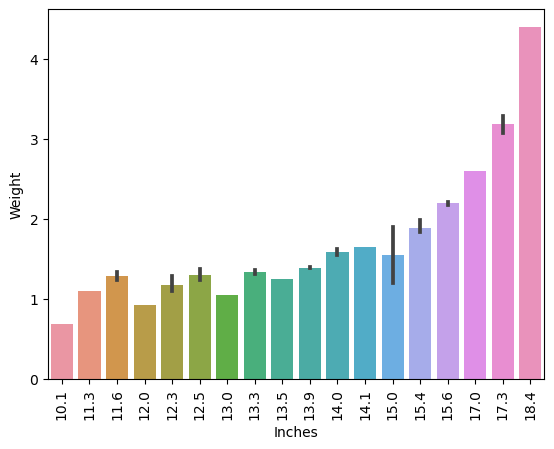

In [19]:
sns.barplot(data=df, y=df.Weight, x=df.Inches)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='count'>

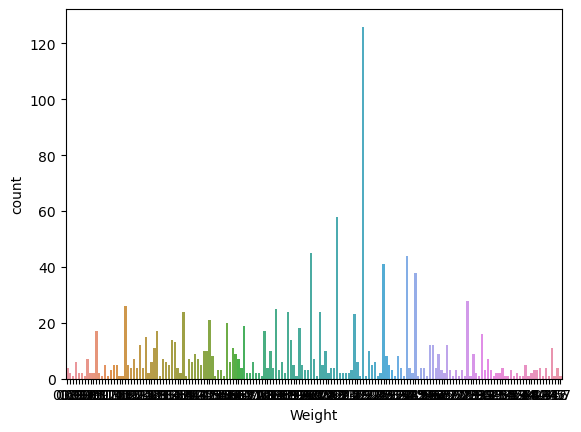

In [20]:
sns.countplot(data=df, x=df.Weight)

In [21]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float32
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(2), float64(1), int32(1), object(7)
memory usage: 96.8+ KB


In [23]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
847,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,512GB SSD,Nvidia GeForce 940M,Windows 10,1.45,54665.28


# EDA

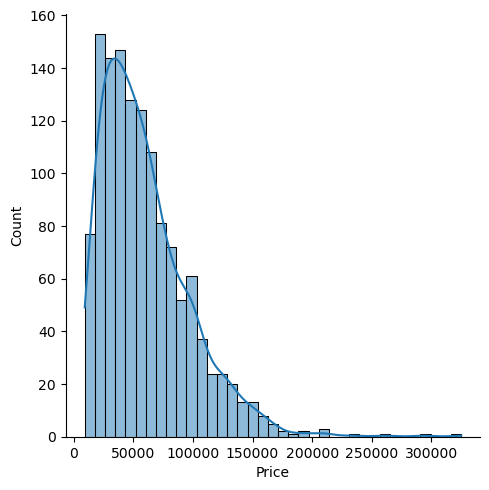

In [24]:
# Plotting a graph based on price
sns.displot(data=df, x=df.Price, kde=True)

<Axes: >

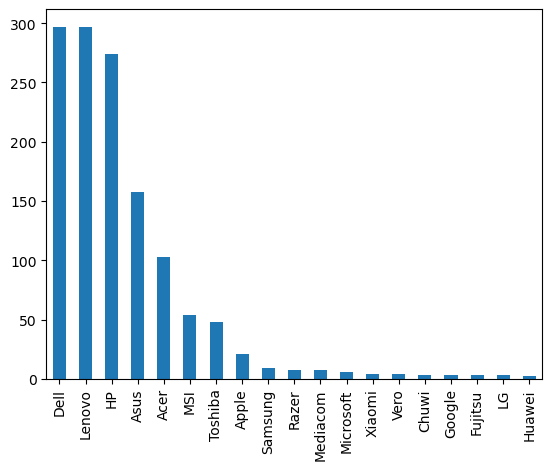

In [25]:
# Finding out which companiey sell more laptops
df['Company'].value_counts().plot(kind='bar')

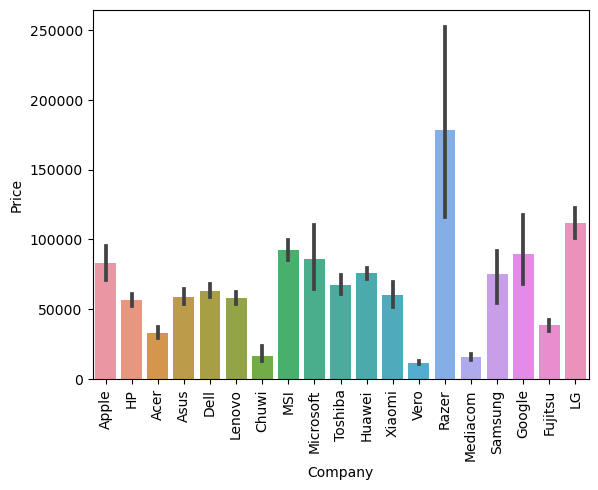

In [26]:
# Checking if the cost of the laptop depends on brand's name
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

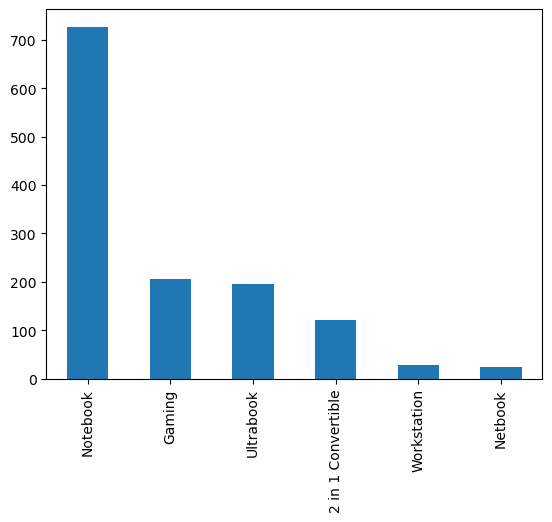

In [27]:
# Type of laptops available
df['TypeName'].value_counts().plot(kind='bar')

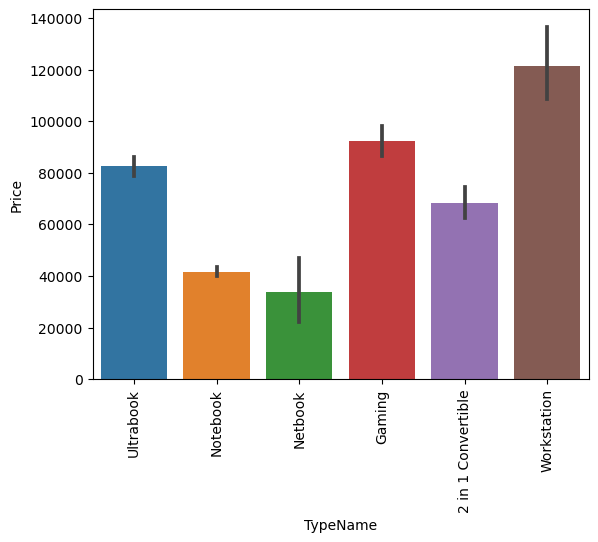

In [28]:
# Checking if the cost of eaclh type of laptop
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

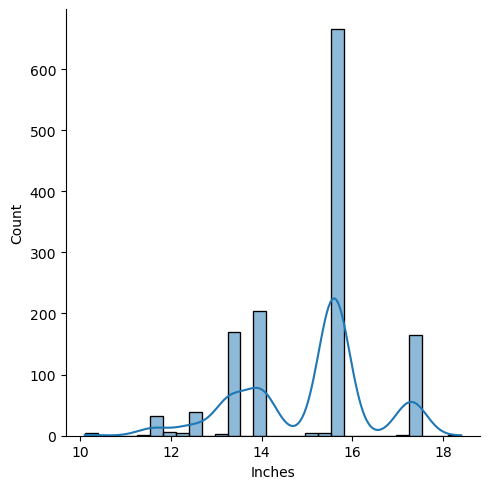

In [29]:
# Sales of laptop based on screen size
sns.displot(x=df['Inches'], kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

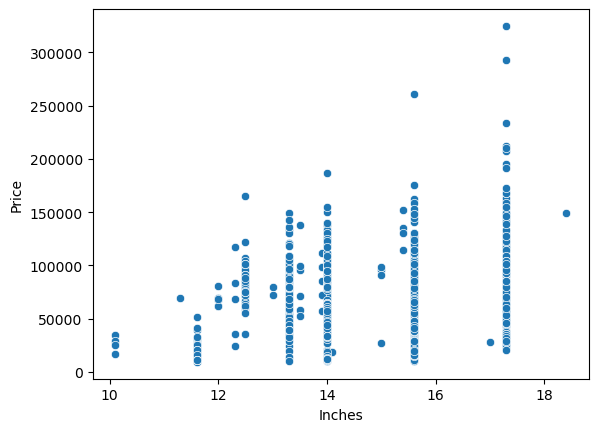

In [30]:
sns.scatterplot(data=df, x=df['Inches'], y=df['Price'])

<Axes: >

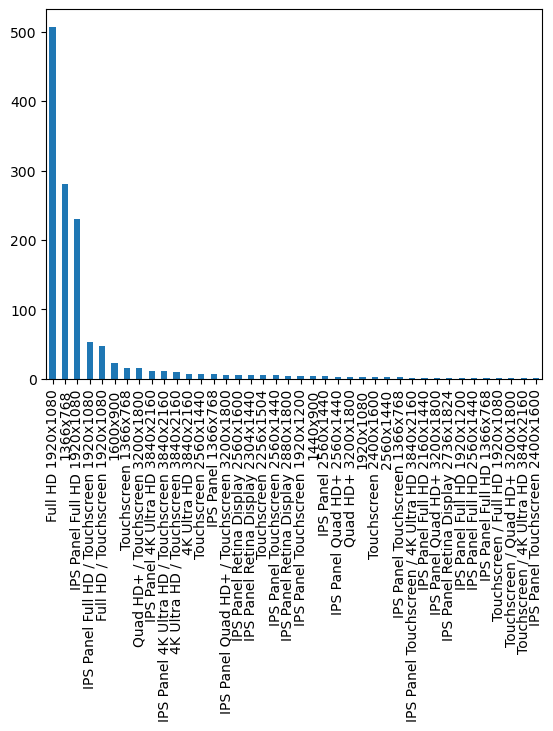

In [31]:
# Screen Resolution column contains multiple information about laptops.
df.ScreenResolution.value_counts().plot(kind='bar')

In [32]:
# Creating a new column for predicting if the laptop is touchscreen or not
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [33]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1098,HP,Notebook,15.600000,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,26640.00,0
492,Asus,Gaming,15.600000,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928.00,0
596,Lenovo,2 in 1 Convertible,13.300000,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,107892.00,1
826,Asus,2 in 1 Convertible,13.300000,Touchscreen / Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,72354.24,1
292,HP,Notebook,17.299999,1600x900,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.54,26053.92,0


In [34]:
# count laptop which are touchscreen and which aren't
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

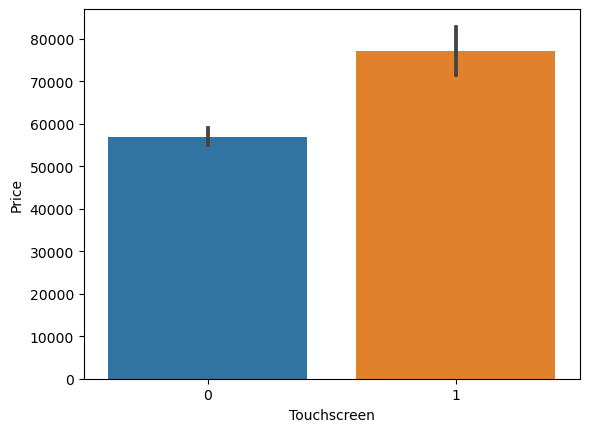

In [35]:
# Price variation based on screen type of the laptop
sns.barplot(data=df, x=df['Touchscreen'], y=df['Price'])

In [36]:
# Creating a new column for predicting if the laptop has IPS display or not
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [37]:
# count laptop which are touchscreen and which aren't
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

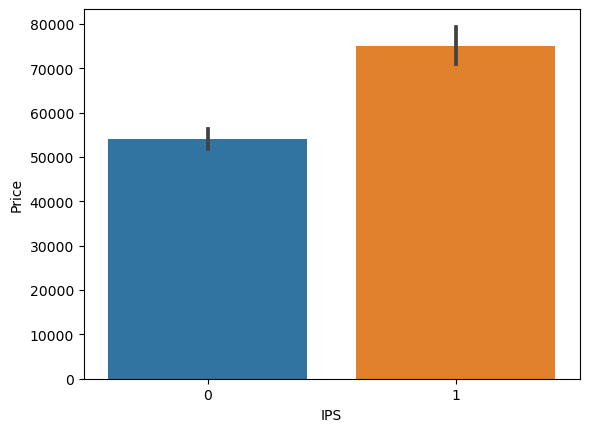

In [38]:
# Price variation on the basis of display of laptop
sns.barplot(data=df, x=df['IPS'], y=df['Price'])

In [39]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
141,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,59461.5456,0,1
976,Lenovo,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70,53386.5600,0,0
72,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,46353.6000,0,0
816,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,95850.7200,1,1
458,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,95850.7200,1,0


In [40]:
split_df = df['ScreenResolution'].str.split('x', expand=True)
print(split_df[0][0])
print(split_df[1][0])
split_df

IPS Panel Retina Display 2560
1600


,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [41]:
# Dividing x & y resolution
df['x_res'] = split_df[0]
df['y_res'] = split_df[1].astype('int32')

In [42]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
70,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,58021.920,1,0,Touchscreen 2256,1504
415,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,AMD Radeon R5 M430,Linux,2.300,31909.392,0,0,Full HD 1920,1080
300,Asus,Notebook,14.0,1366x768,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.300,27119.520,0,0,1366,768
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.600,47898.720,0,1,IPS Panel Full HD 1920,1080
160,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.030,21471.840,0,0,1366,768


In [43]:
df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: x_res, Length: 1303, dtype: object

In [44]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df['x_res'] = df['x_res'].astype('int32')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float32
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(2), float64(1), int32(3), int64(2), object(7)
memory usage: 127.4+ KB


In [46]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [47]:
# Creating a new column PPI(Pixel Per Inches) because using trio(inches, x_res, y_res) will introduce multi-colinearity
# PPI = sqrt(x_res**2 + y_res**2)/inches

df['ppi'] = ((df['x_res']**2 + df['y_res']**2)**0.5/df['Inches']).astype('float64')

In [48]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [49]:
# Dropping columns that are not needed
df.drop(columns=['ScreenResolution', 'x_res', 'y_res', 'Inches'], inplace=True)

In [50]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
983,Fujitsu,Notebook,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,34578.720,0,0,100.454667
1121,HP,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.16,90043.200,0,0,165.632116
14,Apple,Ultrabook,Intel Core M m3 1.2GHz,8,256GB SSD,Intel HD Graphics 615,macOS,0.92,67260.672,0,1,226.415547
1163,Lenovo,Notebook,Intel Core i3 6006U 2.0GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.20,24455.520,0,0,100.454667
629,Dell,Notebook,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,96969.600,0,0,141.211995


In [51]:
# Moving to next column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [52]:
# Dividing into multiple columns
df['cpu_name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [53]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5


In [54]:
def fetch_processor(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel'
    else:
        return 'AMD'

In [55]:
df['cpu_brand'] = df['cpu_name'].apply(fetch_processor)

In [56]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_name,cpu_brand
572,HP,Notebook,AMD A9-Series A9-9420 3GHz,6,256GB SSD,AMD Radeon 530,Windows 10,1.95,34578.72,0,1,141.211995,AMD A9-Series A9-9420,AMD
705,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,42357.60,0,0,141.211995,Intel Core i5,Intel Core i5
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,276.053526,Intel Core i7,Intel Core i7
560,Acer,2 in 1 Convertible,Intel Celeron Dual Core N3350 2.0GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.25,18594.72,1,1,189.905784,Intel Celeron Dual,Other Intel
187,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,No OS,2.40,41505.12,0,1,141.211995,Intel Core i5,Intel Core i5


<Axes: >

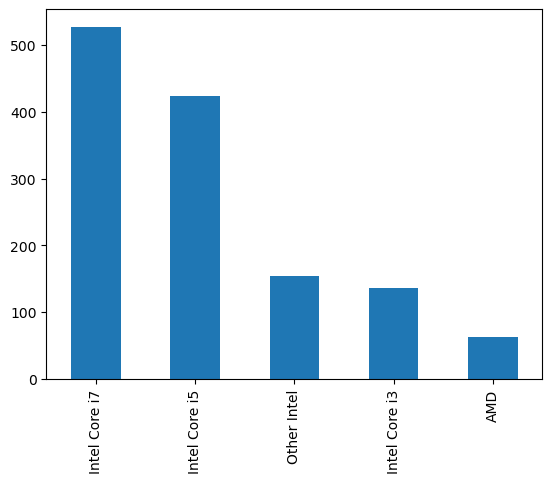

In [57]:
df.cpu_brand.value_counts().plot(kind='bar')

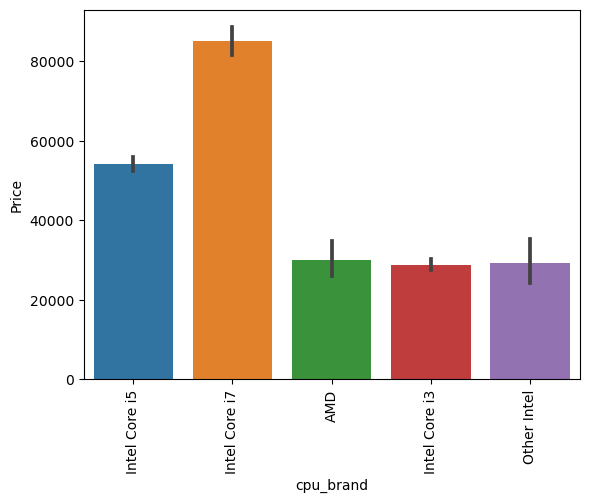

In [58]:
# Price variation with processor
sns.barplot(data=df, x=df['cpu_brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
df.drop(columns=['Cpu','cpu_name'], inplace=True)
df.sample()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand
718,Mediacom,Notebook,4,32GB HDD,Intel HD Graphics 400,Windows 10,1.4,14119.2,0,1,161.725391,Other Intel


<Axes: >

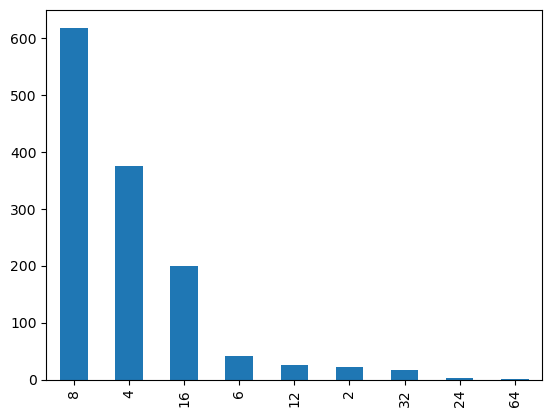

In [60]:
df.Ram.value_counts().plot(kind='bar')

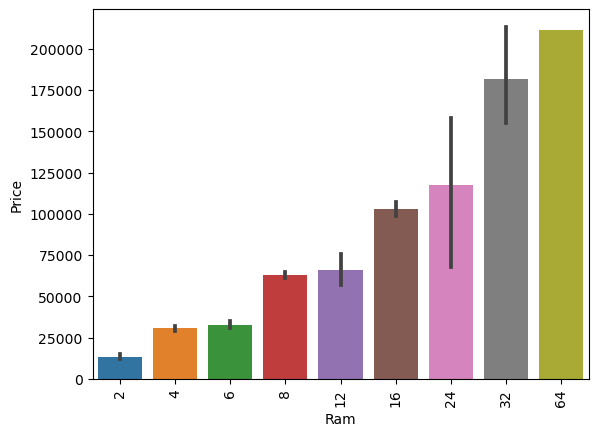

In [61]:
# Price variation with Ram
sns.barplot(data=df, x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [63]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [64]:
# Replacing GB, TB, and values x.0 with ''
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
df['Memory'] = df['Memory'].str.replace('\.0','', regex=True)

In [65]:
df['Memory'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [66]:
# new dataframe with divided hybrid slots
newdf = df['Memory'].str.split('+', expand=True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [67]:
newdf.tail(50)

,0,1
1253,256 SSD,None
1254,500 HDD,None
1255,1000 HDD,None
1256,128 SSD,1000 HDD
1257,500 HDD,None
1258,1000 Hybrid,None
1259,128 SSD,1000 HDD
1260,128 SSD,None
1261,512 SSD,None
1262,1000 HDD,None


In [68]:
# Stripping extra whitespaces
df['first'] = newdf[0].str.strip()
df['second'] = newdf[1]

In [69]:
# Checking the presence of drives in laptops
df['Layer1ssd'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1hdd'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1hybird'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [70]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,first,second,Layer1ssd,Layer1hdd,Layer1hybird,Layer1Flash
204,Dell,Workstation,16,256 SSD + 1000 HDD,Nvidia Quadro M1200,Windows 10,2.80,162770.400,0,0,282.423989,Other Intel,256 SSD,1000 HDD,1,0,0,0
371,Acer,Notebook,4,128 SSD,AMD Radeon R5,Windows 10,2.10,22697.280,0,0,100.454667,AMD,128 SSD,None,1,0,0,0
680,MSI,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,53168.112,0,0,141.211995,Intel Core i5,256 SSD,None,1,0,0,0
886,Dell,Notebook,4,1000 HDD,AMD Radeon R5 M420X,Linux,2.18,24279.696,0,0,100.454667,Intel Core i3,1000 HDD,None,0,1,0,0
191,Vero,Notebook,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.30,13852.800,0,1,157.350512,Other Intel,32 Flash Storage,None,0,0,0,1


In [71]:
# Removing non digit char from first column
df['first'] = df['first'].str.replace(r'\D','', regex=True)
df['first'] = df['first'].str.strip()
# filling null values with 0
df['second'].fillna('0', inplace=True)

In [72]:
df[df['first']=='']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,first,second,Layer1ssd,Layer1hdd,Layer1hybird,Layer1Flash


In [73]:
# Checking the presence of drives in laptops
df['Layer2ssd'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2hdd'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2hybird'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Removing non digit char from first column
df['second'] = df['second'].str.replace(r'\D','', regex=True)

In [74]:
# Changing datatypes
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

In [75]:
df['HDD'] = (df['first']*df['Layer1hdd'] + df['second']*df['Layer2hdd'])
df['SSD'] = (df['first']*df['Layer1ssd'] + df['second']*df['Layer2ssd'])
df['Hybrid'] = df['first']*df['Layer1hybird'] + df['second']*df['Layer2hybird']
df['FlashStorage'] = df['first']*df['Layer1Flash'] + df['second']*df['Layer2Flash']

In [76]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,Layer1hybird,Layer1Flash,Layer2ssd,Layer2hdd,Layer2hybird,Layer2Flash,HDD,SSD,Hybrid,FlashStorage
181,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.23,74538.72,0,0,...,0,0,0,0,0,0,0,256,0,0
1153,Dell,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050Ti,Windows 10,2.62,63882.72,0,0,...,0,0,0,0,0,0,1000,0,0,0
745,Acer,Notebook,2,32 Flash Storage,Intel HD Graphics 400,Chrome OS,1.68,17582.40,0,0,...,0,1,0,0,0,0,0,0,0,32
587,Lenovo,Ultrabook,12,256 SSD,Intel HD Graphics 520,Windows 10,1.40,89137.44,0,1,...,0,0,0,0,0,0,0,256,0,0
520,Lenovo,Gaming,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,74538.72,0,1,...,0,0,0,1,0,0,1000,256,0,0


In [77]:
df.drop(columns=['first','second','Layer1ssd','Layer2ssd','Layer1hdd','Layer2hdd','Layer1hybird','Layer2hybird',
                'Layer1Flash','Layer2Flash','Memory'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,0,0


In [78]:
df.corr(numeric_only=True)['Price']

Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
ppi             0.473487
HDD            -0.096441
SSD             0.670799
Hybrid          0.007989
FlashStorage   -0.040511
Name: Price, dtype: float64

In [79]:
df.drop(columns=['FlashStorage','Hybrid'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256


In [80]:
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [81]:
df['GPU Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df['GPU Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: GPU Brand, Length: 1303, dtype: object

<Axes: >

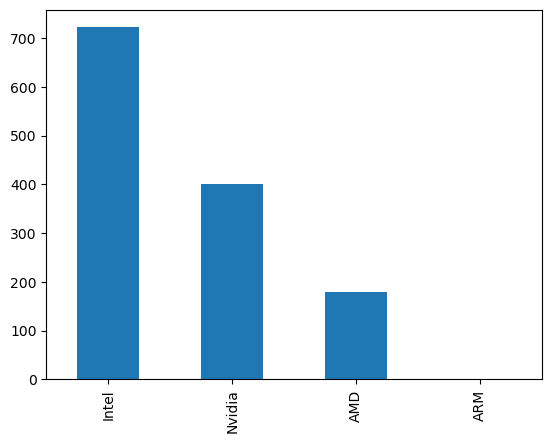

In [82]:
df['GPU Brand'].value_counts().plot(kind='bar')

In [83]:
df = df[df['GPU Brand'] != 'ARM']

<Axes: >

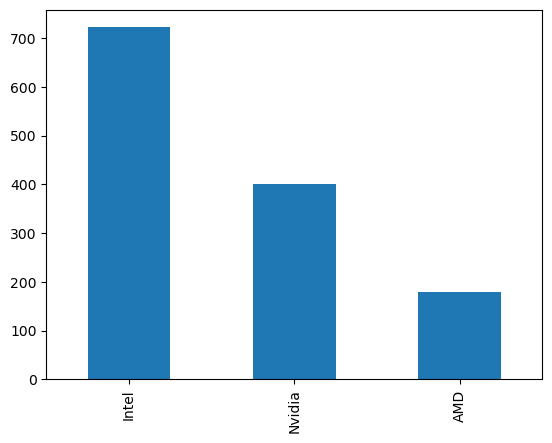

In [84]:
df['GPU Brand'].value_counts().plot(kind='bar')

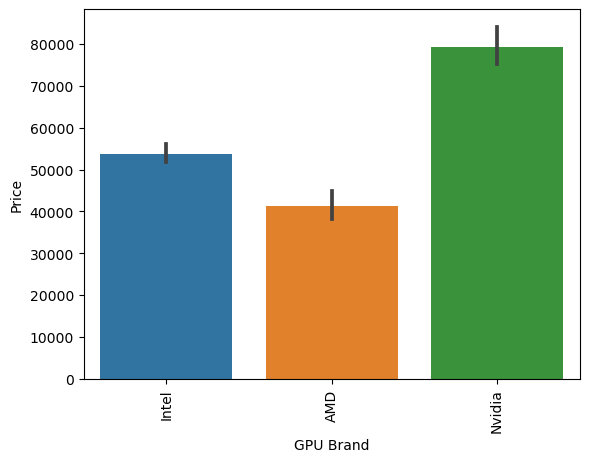

In [85]:
# Price variation with GPU
sns.barplot(data=df, x=df['GPU Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
df.drop(columns=['Gpu'], inplace=True)
df.head()

/tmp/ipykernel_47781/1449269692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace=True)


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel


In [87]:
# Operating System
# df['OpSys'].value_counts().plot(kind='bar')
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

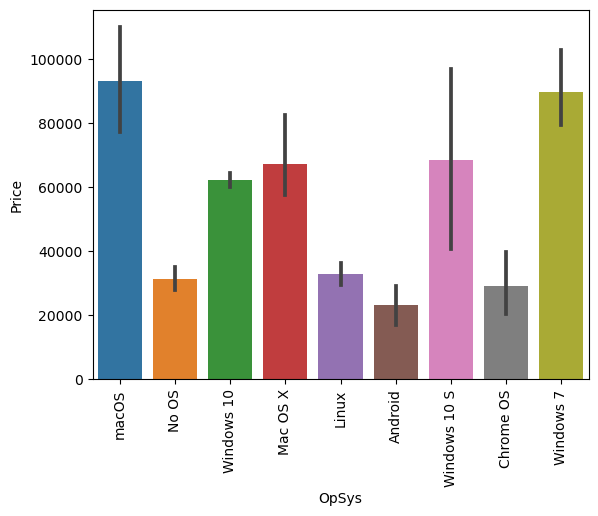

In [88]:
sns.barplot(data=df, x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [89]:
def OP(name):
    if name in ['Windows 10','Windows 10 S','Windows 7']:
        return 'Windows'
    elif name in ['macOS','Mac OS X']:
        return 'macOS'
    elif name == 'Linux':
        return 'Linux'
    else:
        return 'Others/ChromeOs'

In [90]:
df['OS'] = df['OpSys'].apply(OP)

/tmp/ipykernel_47781/513657404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(OP)


In [91]:
df.drop('OpSys', axis=1, inplace=True)

/tmp/ipykernel_47781/1418793761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('OpSys', axis=1, inplace=True)


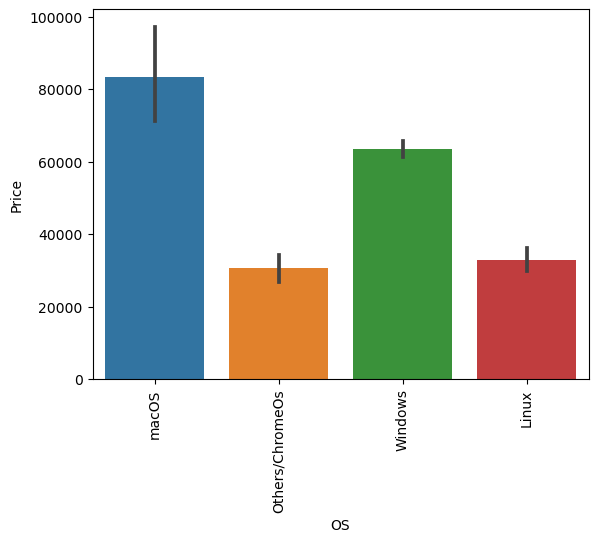

In [92]:
sns.barplot(data=df, x=df['OS'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [93]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,GPU Brand,OS
146,HP,Ultrabook,8,0.97,107305.92,1,1,352.465147,Other Intel,0,512,Intel,Windows
420,Lenovo,2 in 1 Convertible,16,2.00,101178.72,1,1,282.423989,Intel Core i7,0,512,Nvidia,Windows
1290,Dell,Notebook,6,2.30,24455.52,0,0,100.454667,Intel Core i3,1000,0,Intel,Windows
1068,Dell,Gaming,16,3.21,70809.12,0,0,282.423989,Intel Core i7,1000,256,Nvidia,Windows
882,Asus,Notebook,4,1.65,18541.44,0,0,111.141334,Other Intel,0,0,Intel,Windows


<Axes: xlabel='Weight', ylabel='Price'>

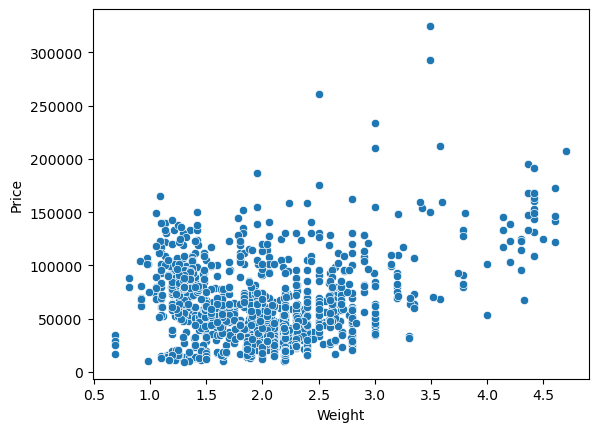

In [94]:
sns.scatterplot(data=df, x='Weight', y='Price')

<Axes: >

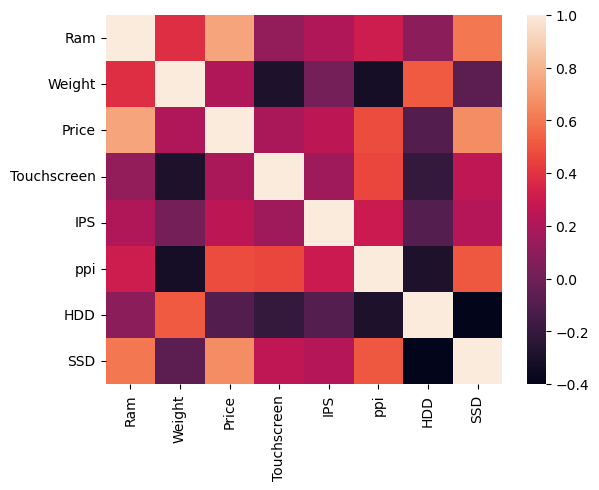

In [95]:
sns.heatmap(df.corr(numeric_only=True))

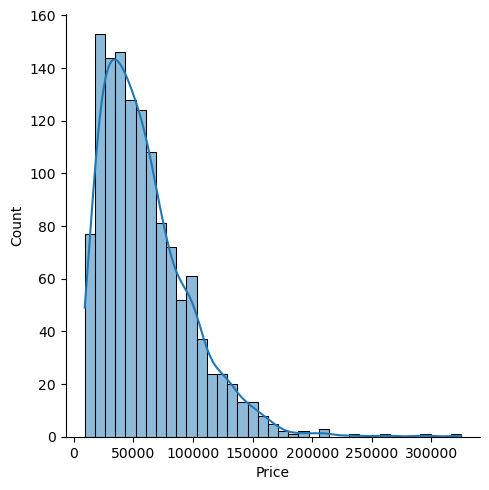

In [96]:
sns.displot(x=df['Price'], kde=True)

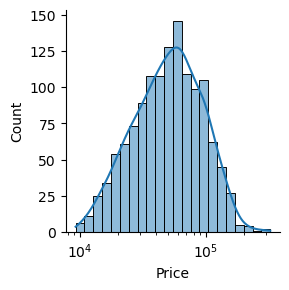

In [98]:
# sns.displot(np.log(df['Price'], kde=True))
# cannot apply log directly to sns object / FacetGrid
g = sns.FacetGrid(data=df)
g.map(sns.histplot, 'Price', log_scale=True, kde=True)

In [99]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [100]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983001,Intel Core i5,0,128,Intel,macOS
1,Apple,Ultrabook,8,1.34,0,0,127.677938,Intel Core i5,0,0,Intel,macOS
2,HP,Notebook,8,1.86,0,0,141.211995,Intel Core i5,0,256,Intel,Others/ChromeOs
3,Apple,Ultrabook,16,1.83,0,1,220.534629,Intel Core i7,0,512,AMD,macOS
4,Apple,Ultrabook,8,1.37,0,1,226.983001,Intel Core i5,0,256,Intel,macOS
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053526,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454667,Intel Core i7,1000,0,AMD,Windows


In [101]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [159]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1041, 12)
(261, 12)
(1041,)
(261,)


In [160]:
df.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,GPU Brand,OS
417,HP,Ultrabook,8,1.43,79920.0,0,0,157.350512,Intel Core i7,0,256,Intel,Windows


In [161]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Linear Regression

In [144]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False), [0,1,7,10,11])
], remainder='passthrough')
step1.fit_transform(x_train, y_train)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00454667e+02, 0.00000000e+00, 1.28000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.41211995e+02, 1.00000000e+03, 1.28000000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.35094207e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00454667e+02, 1.00000000e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00454667e+02, 2.00000000e+03, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.26415547e+02, 0.00000000e+00, 0.00000000e+00]])

In [145]:
from sklearn.linear_model import LinearRegression
step2 = LinearRegression()

In [146]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.7674961677733547
MAE ->  0.21011396131886712


# Ridge Regression

In [147]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.linear_model import Ridge
step2 = Ridge(alpha=5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.7664139441532121
MAE ->  0.20928965090811502


# Lasso Regression

In [148]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.linear_model import Lasso
step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.762887081103636
MAE ->  0.21156126218772586


# KNN

In [149]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.neighbors import KNeighborsRegressor
step2 = KNeighborsRegressor(n_neighbors=4)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.7820577651779996
MAE ->  0.2032487264970911


# Decision Tree

In [150]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.tree import DecisionTreeRegressor
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.8197373926577988
MAE ->  0.18459904562794618


# SVM

In [151]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.svm import SVR
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.7839474118219987
MAE ->  0.2033419802637119


# Random Forest

In [166]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.ensemble import RandomForestRegressor
step2 = RandomForestRegressor(n_estimators=99, max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.843961592741623
MAE ->  0.1641511540073178


# Extra Trees

In [167]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.ensemble import ExtraTreesRegressor
step2 = ExtraTreesRegressor(n_estimators=100, max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.8249721687522
MAE ->  0.16894387325182142


# AdaBoost

In [154]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.ensemble import AdaBoostRegressor
step2 = AdaBoostRegressor(n_estimators=100, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.7256403614177891
MAE ->  0.2224194005163271


# Gradient Boost

In [155]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.ensemble import GradientBoostingRegressor
step2 = GradientBoostingRegressor(n_estimators=970)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.864823333984434
MAE ->  0.1592698772371118


# XGboost

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from xgboost import XGBRegressor
step2 = XGBRegressor(n_estimators=45)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.8779915800432612
MAE ->  0.15900966611670586


# Voting Regressor

In [119]:
from sklearn.ensemble import VotingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

rf = RandomForestRegressor(n_estimators=99, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=970)
xgb = XGBRegressor(n_estimators=45)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb)], weights=[5,1,1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.8781087288332041
MAE ->  0.15140625976626193


# Stacking

In [120]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=99, max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=970)),
    ('xgb', XGBRegressor(n_estimators=45))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score -> ',r2_score(y_pred, y_test))
print('MAE -> ',mean_absolute_error(y_pred, y_test))

R2 Score ->  0.8561052285026345
MAE ->  0.15453601252189952


### Creating website
> Need pipe object & GradientBoost (Best result)

In [168]:
# Exporting the Model
import pickle
pickle.dump(df, open('df.pkl','wb'), protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(pipe, open('pipe.pkl','wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [165]:
# import joblib
# joblib.dump(df, 'df.pickle')
# joblib.dump(pipe, 'pipe.pickle')    

In [125]:
df.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,GPU Brand,OS
1080,Lenovo,Ultrabook,8,0.99,74538.72,1,1,234.976765,Other Intel,0,512,Intel,Windows
